In [1]:
from code.io.EventProcessor import EventProcessor
from code.io.TrackingProcessor import TrackingProcessor
from code.io.PossessionProcessor import PossessionProcessor
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

GAME_ID = "0022300345"

event_df = EventProcessor.load_game(GAME_ID)
tracking_df = TrackingProcessor.load_game(GAME_ID)
#possessions_df = PossessionProcessor.load_game(GAME_ID)

In [2]:
from code.util.StatsUtil import StatsUtil

# true_point_events = StatsUtil.calculate_true_points(event_df)
# true_point_events.to_csv('true_points.csv')
# true_point_events['true_points_produced'].value_counts()

In [3]:
transition_events = EventProcessor.extract_transition_opportunities(event_df)
event = transition_events[0]
start, end = EventProcessor.get_start_end_time_of_event(event)
moment_df = TrackingProcessor.extract_moment_from_timestamps(tracking_df, start, end)

In [4]:
from code.util.FeatureUtil import FeatureUtil

# possession = PossessionProcessor.extract_possesion_by_timestamp(possessions_df, start)
# cross_3pt = FeatureUtil.find_ball_crossing_far_three_point_line(moment_df, possession.iloc[0]["basketX"])
# cross_half = FeatureUtil.find_ball_crossing_halfcourt(moment_df, possession.iloc[0]["basketX"])
# in_zone_of_death = FeatureUtil.find_ball_moment(moment_df, FeatureUtil.is_in_zone_of_death, possession.iloc[0]["basketX"])
# print(cross_3pt, cross_half, in_zone_of_death)

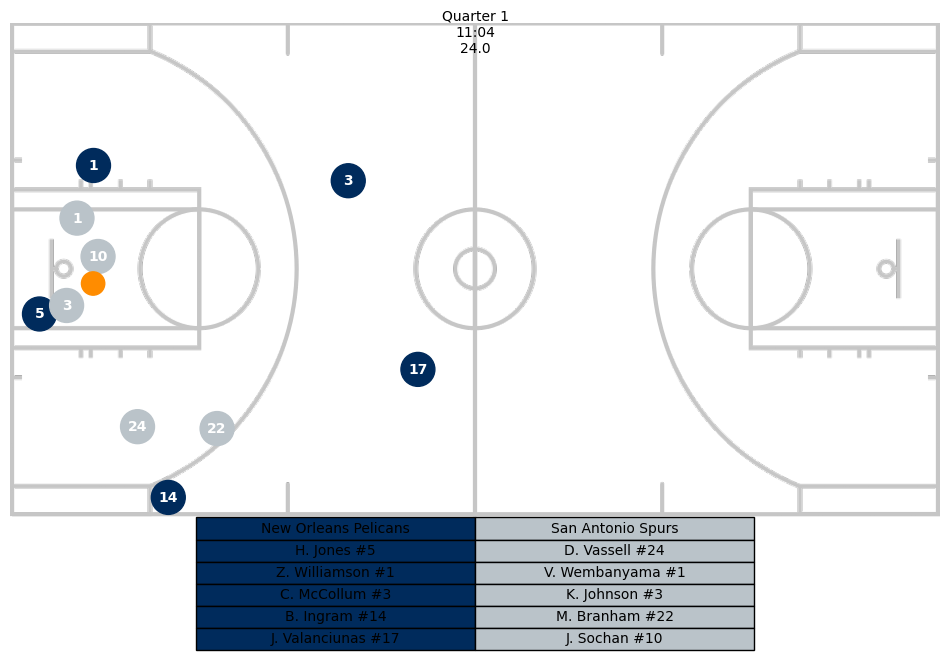

In [5]:
from code.util.VisUtil import VisUtil

anim = VisUtil(moment_df)
#anim.display_animation(possession.iloc[0])
anim.plot_frame_at_timestamp(start)